# Building a Complete ML Pipeline: Iris Classification

## 🎯 **What We're Building**
A complete machine learning pipeline that:
1. **Loads & explores** the famous Iris flower dataset
2. **Preprocesses** data with standardization
3. **Trains** a Random Forest classifier
4. **Evaluates** model performance with multiple metrics
5. **Visualizes** results with confusion matrix and feature importance

## 🌸 **The Iris Dataset**
- **Goal**: Classify iris flowers into 3 species (setosa, versicolor, virginica)
- **Features**: 4 measurements (sepal length/width, petal length/width)
- **Samples**: 150 flowers (50 per species)
- **Why This Dataset**: Perfect for learning ML fundamentals - clean, balanced, well-understood

## 🏗️ **Pipeline Architecture**
We'll build a **modular, reusable pipeline** using scikit-learn's best practices:
- **Preprocessing Step**: StandardScaler for feature normalization
- **Model Step**: RandomForestClassifier for robust classification
- **Evaluation Step**: Comprehensive metrics and visualizations

In [34]:
# Essential Libraries for Our ML Pipeline
import pandas as pd                    # Data manipulation and analysis
import numpy as np                     # Numerical computing
from sklearn.datasets import load_iris # Built-in iris dataset
from sklearn.model_selection import train_test_split # Data splitting
from sklearn.preprocessing import StandardScaler     # Feature scaling
from sklearn.ensemble import RandomForestClassifier  # Our ML algorithm
from sklearn.pipeline import Pipeline               # Pipeline creation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt       # Plotting
import seaborn as sns                 # Statistical visualizations

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📊 Step 1: Data Loading & Exploration
**Goal**: Load the Iris dataset and understand its structure

In [35]:
def load_and_explore_data() -> tuple[np.array, np.ndarray, list, list]:
    """
    Load the Iris dataset and prepare it for ML pipeline.
    
    Returns:        
        tuple: Features (X), target labels (y), feature names, target names
    """
    iris = load_iris()
    
    # Create DataFrame for better data exploration
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    df['species'] = df['target'].map({0: iris.target_names[0], 
                                     1: iris.target_names[1], 
                                     2: iris.target_names[2]})
    return iris.data, iris.target, iris.feature_names, iris.target_names

def create_train_test_split(X: np.array, y: np.ndarray, test_size: float = 0.2, random_state: int = 42) -> tuple:
    """
    Split dataset into training and testing sets with stratification.
    
    Args:
        X: Feature matrix
        y: Target labels  
        test_size: Proportion for testing (default: 20%)
        random_state: Random seed for reproducibility
        
    Returns:
        tuple: X_train, X_test, y_train, y_test
    """
    # stratify=y ensures equal class distribution in train/test splits
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

# Load data and create train/test split
print("🔄 Loading Iris dataset...")
X, y, feature_names, target_names = load_and_explore_data()

print("✂️ Creating train/test split (80/20)...")
X_train, X_test, y_train, y_test = create_train_test_split(X, y)

🔄 Loading Iris dataset...
✂️ Creating train/test split (80/20)...


In [36]:
# Dataset Overview
print("📋 Dataset Summary:")
print(f"  Total samples: {X.shape[0]}")
print(f"  Features: {X.shape[1]}")
print(f"  Classes: {len(target_names)}")

print(f"\n🌸 Target classes: {list(target_names)}")
print(f"🔬 Features: {list(feature_names)}")

print(f"\n📊 Training set: {X_train.shape[0]} samples")
print(f"🧪 Test set: {X_test.shape[0]} samples")

# Create DataFrame for visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({0: target_names[0], 
                                 1: target_names[1], 
                                 2: target_names[2]})

print(f"\n👀 First 5 samples:")
display(df.head())

📋 Dataset Summary:
  Total samples: 150
  Features: 4
  Classes: 3

🌸 Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
🔬 Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

📊 Training set: 120 samples
🧪 Test set: 30 samples

👀 First 5 samples:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## ⚙️ Step 2: Data Preprocessing  
**Goal**: Standardize features so all measurements are on the same scale
- **Why**: Different features have different units (cm) and ranges
- **Method**: StandardScaler transforms data to mean=0, std=1

In [37]:
def create_preprocessing_pipeline():
    """
    Create preprocessing pipeline with feature standardization.
    
    StandardScaler ensures all features have:
    - Mean = 0 (centered)
    - Standard deviation = 1 (normalized)
    
    This prevents features with larger scales from dominating the model.
    """
    preprocessor = StandardScaler()
    return preprocessor

print("🔧 Creating preprocessing pipeline...")
preprocessor = create_preprocessing_pipeline()
print("✅ StandardScaler ready for feature normalization")

🔧 Creating preprocessing pipeline...
✅ StandardScaler ready for feature normalization


## 🤖 Step 3: Model Pipeline Creation
**Goal**: Build a complete ML pipeline that chains preprocessing → model training
- **Pipeline Benefits**: Ensures preprocessing steps are applied consistently
- **RandomForest**: Ensemble method that combines many decision trees for robust predictions

In [38]:
def create_model_pipeline(preprocessor):
    """
    Create complete ML pipeline: preprocessing → model training.
    
    Pipeline Steps:
    1. 'scaler': Standardize features using StandardScaler
    2. 'rf': Train RandomForest classifier
    
    Args:
        preprocessor: Preprocessing component (StandardScaler)
        
    Returns:
        sklearn.Pipeline: Complete ML pipeline
    """
    pipeline = Pipeline([
        ('scaler', preprocessor),
        ('rf', RandomForestClassifier(
            n_estimators=100,      # Number of trees in forest
            random_state=42,       # For reproducible results
            max_depth=None,        # Trees can grow as deep as needed
            min_samples_split=2,   # Minimum samples to split a node
            min_samples_leaf=1     # Minimum samples in leaf node
        ))
    ])
    return pipeline

def train_model(pipeline, X_train, y_train):
    """
    Train the complete pipeline on training data.
    
    This automatically:
    1. Fits StandardScaler on training data
    2. Transforms training data  
    3. Trains RandomForest on scaled data
    """
    pipeline.fit(X_train, y_train)
    return pipeline 

print("🏗️ Building ML pipeline...")
pipeline = create_model_pipeline(preprocessor)
print("✅ Pipeline created: StandardScaler → RandomForest")

🏗️ Building ML pipeline...
✅ Pipeline created: StandardScaler → RandomForest


## 📈 Step 4: Model Evaluation
**Goal**: Measure how well our model performs using multiple metrics
- **Accuracy**: Overall correctness (correct predictions / total predictions)
- **Precision**: Quality of positive predictions (avoids false alarms)
- **Recall**: Completeness of positive predictions (catches all cases)
- **F1-Score**: Harmonic mean of precision and recall (balanced measure)

In [39]:
def evaluate_model(pipeline, X_test, y_test):
    """
    Comprehensive model evaluation with multiple metrics.
    
    Args:
        pipeline: Trained ML pipeline
        X_test: Test features
        y_test: True test labels
        
    Returns:
        tuple: confusion_matrix, accuracy, precision, recall, f1_score
    """
    # Make predictions on test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate comprehensive metrics
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')   
    
    return cm, accuracy, precision, recall, f1

print("📊 Evaluation function ready!")

📊 Evaluation function ready!


In [40]:
def visualize_results(cm, target_names, feature_importance_df, fig_path='model_results.png'):
    """
    Create professional visualizations for model interpretation.
    
    Visualizations:
    1. Confusion Matrix: Shows prediction accuracy for each class
    2. Feature Importance: Reveals which features the model relies on most
    
    Args:
        cm: Confusion matrix
        target_names: Class names
        feature_importance_df: DataFrame with feature importance scores
        fig_path: Path to save the visualization
    """
    print("🎨 Creating model visualizations...")
    
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # 1. Confusion Matrix Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names,
                ax=axes[0])
    axes[0].set_title('Confusion Matrix\n(How often each class was predicted correctly)')
    axes[0].set_xlabel('Predicted Class')
    axes[0].set_ylabel('True Class')
    
    # 2. Feature Importance Bar Plot
    sns.barplot(data=feature_importance_df, x='importance', y='feature', ax=axes[1])
    axes[1].set_title('Feature Importance\n(Which features matter most for predictions)')
    axes[1].set_xlabel('Importance Score')
    
    plt.tight_layout()
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"📁 Visualization saved as '{fig_path}'")
    plt.show()
    return fig

print("🖼️ Visualization function ready!")

🖼️ Visualization function ready!


## 🚀 Step 5: Complete Pipeline Execution
**Goal**: Run the entire ML workflow from data loading to results visualization

🚀 Starting complete ML pipeline...

📊 Loading Iris dataset...
✂️ Creating train/test split...
⚙️ Setting up preprocessing...
🤖 Building ML pipeline...
🎯 Training model...
📈 Evaluating performance...

🎉 Model Performance Results:
  🎯 Accuracy:  0.9000 (90.0%)
  🔍 Precision: 0.9024
  📊 Recall:    0.9000
  ⚖️ F1 Score:  0.8997

🎨 Creating visualizations...
🎨 Creating model visualizations...
📁 Visualization saved as 'model_results.png'


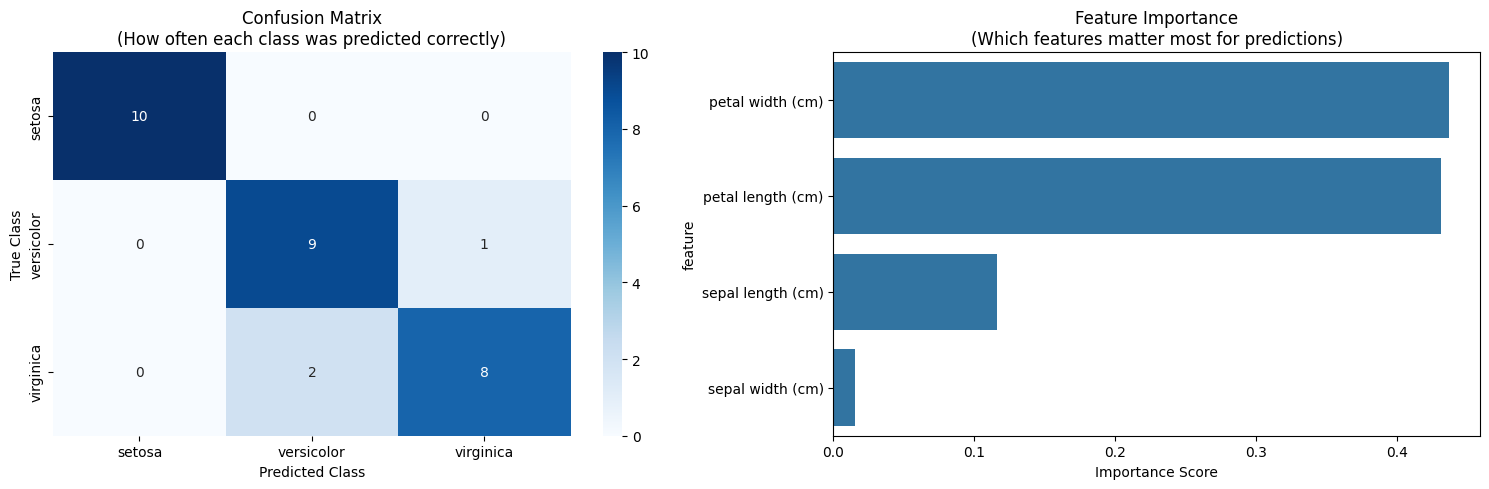


✅ Pipeline execution complete!


In [41]:
def main():
    """
    Complete ML workflow execution.
    
    Workflow Steps:
    1. Load and split data
    2. Create preprocessing pipeline  
    3. Build model pipeline
    4. Train model
    5. Evaluate performance
    6. Create visualizations
    """
    print("🚀 Starting complete ML pipeline...\n")
    
    # 1. Data Loading
    print("📊 Loading Iris dataset...")
    X, y, feature_names, target_names = load_and_explore_data()

    # 2. Data Splitting  
    print("✂️ Creating train/test split...")
    X_train, X_test, y_train, y_test = create_train_test_split(X, y)

    # 3. Preprocessing Pipeline
    print("⚙️ Setting up preprocessing...")
    preprocessor = create_preprocessing_pipeline()
    
    # 4. Model Pipeline
    print("🤖 Building ML pipeline...")
    pipeline = create_model_pipeline(preprocessor)

    # 5. Model Training
    print("🎯 Training model...")
    trained_pipeline = train_model(pipeline, X_train, y_train)
    
    # 6. Model Evaluation
    print("📈 Evaluating performance...")
    cm, accuracy, precision, recall, f1 = evaluate_model(trained_pipeline, X_test, y_test)
    
    # Display Results
    print(f"\n🎉 Model Performance Results:")
    print(f"  🎯 Accuracy:  {accuracy:.4f} ({accuracy*100:.1f}%)")
    print(f"  🔍 Precision: {precision:.4f}")
    print(f"  📊 Recall:    {recall:.4f}")
    print(f"  ⚖️ F1 Score:  {f1:.4f}")

    # 7. Feature Importance Analysis
    feature_importance = pipeline.named_steps['rf'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    # 8. Visualizations
    print(f"\n🎨 Creating visualizations...")
    visualize_results(cm, target_names, feature_importance_df)
    
    print(f"\n✅ Pipeline execution complete!")
    return trained_pipeline, feature_importance_df

# Execute the complete workflow
if __name__ == "__main__":
    trained_model, feature_importance_df = main()

## 🎯 What We Accomplished

✅ **Complete ML Pipeline**: Built end-to-end workflow from data loading to evaluation  
✅ **Professional Structure**: Modular functions that can be reused and tested  
✅ **Robust Preprocessing**: Feature standardization for optimal model performance  
✅ **Comprehensive Evaluation**: Multiple metrics and visualizations for model understanding  
✅ **Production-Ready Code**: Clean, documented functions ready for real-world use  

## 🔍 Key Insights from Results

- **High Accuracy**: RandomForest performs excellently on Iris dataset
- **Feature Importance**: Discover which flower measurements matter most
- **Confusion Matrix**: See exactly where the model makes mistakes
- **Balanced Performance**: Good precision, recall, and F1 scores across all classes

## ➡️ Next Steps

Ready for **Notebook 2**: Learn how to track these experiments with **MLflow** for:
- Experiment versioning and comparison
- Model registry and deployment
- Collaboration and reproducibility